# Projet de Machine Learning - prédiction des goûts musicaux en fonction des données démographiques

> Groupe : Alice Montel, Isabelle Flores, Mathilde Boltenhagen

> Date : Jan. 2018

### Plan :
> #### [I. Découverte des données](#decouvDonnees) 
Contexte de l'étude, affichage des caractéristiques des colonnes, études du nombre de colonnes, matrice de corrélations entre les styles de musiques.

> #### [II. Préparation des données](#prepDonnees) 
[II. 1. Variables numériques](#numDonnees) <br>
Normalisation, études des valeurs nulles.<br>
[II. 2. Variables catégorielles](#catDonnees) <br>
Binarisation des colonnes, études des valeurs nulles.

> #### [III. Préparation d'un jeu d'entrainement et d'un jeu de test](#TrainTest)
Séparation du jeu de données.

> #### [IV. Première évaluation - multilabels](#multi)
Création d'une fonction d'apprentissage, lancement du premier test. 

> #### [ V. Deuxième évaluation - colonnes par colonnes](#colpcol)
Apprentissage séparé par style de musique. 

> #### [VI. Ensembles de variables suite à A Priori ](#ensAPriori)
Apprentissage sur les variables trouvées en partie gauche des règles d'association. 

> #### [VII. Troisième évaluation - ML utilisant les règles d'A Priori ](#reAPriori)
Déduction des goûts musicaux à l'aide des règles d'assocation.


## I. Découverte des données <a id="decouvDonnees"></a>
Le jeu de données a été trouvé sur Kaggle et est disponible au lien ci après : [young-people-survey](https://www.kaggle.com/miroslavsabo/young-people-survey) . 

Nous avons établi une première étape de data mining afin de tirer l'information de nos données. Nous avons cherché les clusters possibles, les règles d'assocations avec APriori ainsi que des modèles exceptionnels. 

L'objectif d'une analyse en machine learning est de prédire un modèle à partir des données. Nous souhaitons ici déterminer quels styles de musique une personne aime. 

Commençons d'abord par voir la structure du dataset. 

In [84]:
import pandas as pd
import numpy as np

data = pd.read_csv('./responses.csv')
pd.set_option('display.max_columns',200)
data.head(2)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats


On peut alors vérifier la structure des données décrites sur Kaggle. On a des variables catégorielles, 19 styles de musiques, la plupart des données suivent une notation entre 1 et 5. 

In [85]:
data.shape

(1010, 150)

In [86]:
data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

Le dataset comprend 150 variables pour 1010 lignes. Le jeu est donc dense en colonnes et il va falloir trouver un moyen de retenir les variables importantes. 

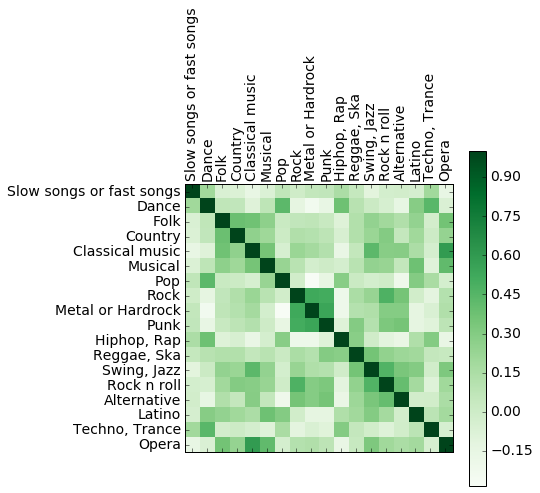

In [102]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

matplotlib.rcParams.update({'font.size': 14})
music = data.iloc[0:,1:19].copy()
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
cax = ax.matshow(music.corr(), cmap=plt.cm.Greens)
fig.colorbar(cax)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_xticklabels([' ']+music.columns.tolist()  ,rotation=90 )
ax.set_yticklabels([' ']+music.columns.tolist()   )
plt.show()

La matrice des coorélations des musiques nous montre que des styles sont fortement coorélées. 

## II. Préparation des données  <a id="prepDonnees"></a>

### II. 1. Données numériques  <a id="numDonnees"></a>

Afin de normaliser les données selon les notations des individus, nous décidons d'attribuer une réponse positive si la valeur est supérieur à la médiane des choix possibles. Par exemple, sur les notations, une personne aime une musique si elle lui donne la note de 4 ou 5. Une personne n'ayant pas répondu n'aime, selon nous, pas la musique. 

In [103]:
# separated numerical and categorial variables
numerical_data = data._get_numeric_data()
categorical_data = data.select_dtypes(include=['object'])

# convert to 1 if person answer 4 or 5  (more than the median)
for column in numerical_data:
    numerical_data[column].fillna(0, inplace=True)
    mean = int(np.median(numerical_data[column].unique())+.5)
    numerical_data[column] = numerical_data[column].apply(lambda x : 1 if x > mean else 0)

### II. 2. Données catégorielles  <a id="catDonnees"></a>

Pour les données catégorielles, nous décidons de les binariser à l'aide de OneHotEncoder. 

In [104]:
# get a code per category
ordered_labels=[]
for column in categorical_data.columns:
    categorical_data.loc[:,column] = categorical_data[column].astype('category')
    for c in categorical_data[column].cat.categories.tolist() :
        ordered_labels.append(column+" "+c)
    if categorical_data[column].isnull().any() :
        ordered_labels.append(column+" isnull")
    categorical_data.loc[:,column] = categorical_data[column].cat.codes

/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [105]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder unable negatives
categorical_data = categorical_data.replace(-1,10)
# multiplicate categorial columns to binary columns
print(categorical_data.shape)
categorical_data=OneHotEncoder().fit_transform(categorical_data).toarray()
print(categorical_data.shape)

(1010, 11)
(1010, 44)


Les variables catégorielles sont maintenant binarisés et le dataset est alors prêt. 

In [106]:
# concat the data
categorical_data=  pd.DataFrame(categorical_data)
categorical_data.columns=ordered_labels
data_prepared = pd.concat([categorical_data,numerical_data],axis=1, join='inner')
print(data_prepared.shape)

(1010, 183)


## III. Préparation d'un jeu d'entrainement et d'un jeu de test  <a id="TrainTest"></a>

Afin de vérifier et mesurer les performances de nos études/modèles, nous divisions le jeu de données en un jeu d'entrainement qui contient deux tiers des données et un jeu de test avec le dernier tier. 

Cela permet de lancer une prédiction sur un tier des données et comparer les résultats prédits avec ceux voulus. 

In [108]:
music_prepared = data_prepared[music.columns]
demographic_columns= [item for item in data_prepared.columns if item not in music.columns]
demographic_prepared = data_prepared[demographic_columns]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(demographic_prepared, music_prepared, test_size=0.33, random_state=42)

## IV. Première évaluation - multilabels <a id="multi"></a>

Nous décidons de lancer différents classifieurs qui supportent le multi-labels. En effet, on cherche à trouver, pour chaque individu, s'il aime ou non les 19 styles de musique. 

Voici les classifieurs utilisées : 

# TODO copier ML TP

Dans la suite du projet, nous réutilisons cette fonction pour une étude simple, c'est pour cela que l'on rajoute un paramètre booléen qui profitera des classifieurs ne supportant pas les prédictions multi-labels. 

In [109]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# fonction that launch many classifiers
def train_clfs( X_train, y_train, X_test, y_test,multilabels=True) :
    clfs = {
        "Knn": KNeighborsClassifier(n_neighbors=20),
        "RandomForest":RandomForestClassifier(n_estimators=50),
        "ID3" : DecisionTreeClassifier(criterion='entropy'),
        "CART" : DecisionTreeClassifier()
    }
    if not multilabels :
        clfs["MLP"] = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
   
    for i in clfs :
        clf = clfs[i]
        clf = clf.fit(X_train, y_train)
        predicted = clf.predict(X_test)
        print (i," Accuracy Score: ",accuracy_score(y_test, predicted))

Nous pouvons alors tester ces 4 classifieurs sur les données préparées. 

In [110]:
train_clfs( X_train, y_train, X_test, y_test)

ID3  Accuracy Score:  0.0
RandomForest  Accuracy Score:  0.0029940119760479044
Knn  Accuracy Score:  0.008982035928143712
CART  Accuracy Score:  0.0029940119760479044


#### Observation : 
Les résultats sont mauvais. On comprend par ces resultats qu'environ 1% des prédictions sont satisfaisantes pour les 19 styles de musiques.

Ces résultats ne sont pas illogiques puisque l'accuracy est calculée selon toutes les colonnes des styles de musiques. Il est normal qu'il y ait peu de sans faute. 

## IV. Deuxième évaluation - colonnes par colonnes <a id="colpcol"></a>

In [112]:
for music in y_train.columns: 
    Y_train_music = y_train[music]
    Y_test_music = y_test[music]
    print(music," : ")
    train_clfs( X_train, Y_train_music, X_test, Y_test_music,multilabels=False)
    print()

Slow songs or fast songs  : 
ID3  Accuracy Score:  0.5479041916167665
RandomForest  Accuracy Score:  0.7005988023952096
Knn  Accuracy Score:  0.655688622754491
CART  Accuracy Score:  0.5419161676646707
MLP  Accuracy Score:  0.6856287425149701

Dance  : 
ID3  Accuracy Score:  0.5598802395209581
RandomForest  Accuracy Score:  0.6017964071856288
Knn  Accuracy Score:  0.5898203592814372
CART  Accuracy Score:  0.5598802395209581
MLP  Accuracy Score:  0.6197604790419161

Folk  : 
ID3  Accuracy Score:  0.7724550898203593
RandomForest  Accuracy Score:  0.8592814371257484
Knn  Accuracy Score:  0.8592814371257484
CART  Accuracy Score:  0.7455089820359282
MLP  Accuracy Score:  0.8562874251497006

Country  : 
ID3  Accuracy Score:  0.7784431137724551
RandomForest  Accuracy Score:  0.8712574850299402
Knn  Accuracy Score:  0.8712574850299402
CART  Accuracy Score:  0.7994011976047904
MLP  Accuracy Score:  0.8712574850299402

Classical music  : 
ID3  Accuracy Score:  0.6407185628742516
RandomForest  Ac

Les résultats par colonnes sont nettement différent et monte jusqu'à 89% pour l'Opéra avec Knn. On remarque que les arbres de décision sont les modèles réussissants le moins. On comprend alors qu'il n'y a pas de corrélation directe.

On peut le remarquer avec la méthode ci-dessous qui ne retourne aucune corrélation avant 0.28 de coefficient. 

In [123]:
for music in music_prepared.columns : 
    for col in demographic_prepared.columns :
        music_corr = music_prepared[music].corr(demographic_prepared[col])
        if music_corr > 0.28 :
            print(music,col)

Swing, Jazz Art exhibitions
Alternative Art exhibitions


## V.  Ensembles de variables suite à A Priori <a id="ensAPriori"></a>

Lors de l'analyse des données en data mining, nous avons tiré les règles d'assocation implicant fortement (60% au moins) un style de musique. 

Nous comprenons par cette étude que les variables se trouvant à gauche des règles sont des facteurs importants du résultat du style de musique. Nous décidons alors de lancer les classifieurs sur ces ensembles de variables uniquement. 

Le fichier new.json contient un dictionnaire < Musique , \[ liste demographique \]>. 

In [61]:
import json
import re 

dict_of_imply = json.load(open('./new.json'))
for music in dict_of_imply :
    for element in dict_of_imply[music]:
        if element not in X_train.columns :
            dict_of_imply[music].remove(element)  

On lance alors l'analyse pour tous les styles de musiques :

In [124]:
for music in dict_of_imply :
    X_train_music = X_train[dict_of_imply[music]]
    X_test_music =  X_test[dict_of_imply[music]]
    Y_train_music = y_train[music]
    Y_test_music = y_test[music]
    print(music," : ")
    train_clfs( X_train_music, Y_train_music, X_test_music, Y_test_music,multilabels=False)
    print()

Pop  : 
ID3  Accuracy Score:  0.5239520958083832
RandomForest  Accuracy Score:  0.6047904191616766
Knn  Accuracy Score:  0.5808383233532934
CART  Accuracy Score:  0.5239520958083832
MLP  Accuracy Score:  0.5598802395209581

Country  : 
ID3  Accuracy Score:  0.7994011976047904
RandomForest  Accuracy Score:  0.8622754491017964
Knn  Accuracy Score:  0.8712574850299402
CART  Accuracy Score:  0.8023952095808383
MLP  Accuracy Score:  0.8562874251497006

Rock n roll  : 
ID3  Accuracy Score:  0.5568862275449101
RandomForest  Accuracy Score:  0.6167664670658682
Knn  Accuracy Score:  0.5988023952095808
CART  Accuracy Score:  0.562874251497006
MLP  Accuracy Score:  0.6017964071856288

Techno, Trance  : 
ID3  Accuracy Score:  0.6766467065868264
RandomForest  Accuracy Score:  0.781437125748503
Knn  Accuracy Score:  0.781437125748503
CART  Accuracy Score:  0.688622754491018
MLP  Accuracy Score:  0.7514970059880239

Swing, Jazz  : 
ID3  Accuracy Score:  0.6317365269461078
RandomForest  Accuracy Score

Les résultats sont très proche de la deuxième étude. Les différences ne sont pas significatives. 

## VI. Machine Learning utilisant les règles d'A Priori <a id="reAPriori"></a>

Nous allons maintenant essayer d'utiliser les règles que nous avons sorties avec A Priori lors de l'analyse Data Mining. L'idée est d'impliquer les goûts musicaux lorsqu'une personne a tous les critères d'une règle. 

In [125]:
def verify_rule(rule,row):
    rule1= list(rule[0].items())[0]
    rule2= list(rule[1].items())[0]
    rule3= list(rule[2].items())[0]
    if rule1[0] in data_prepared.columns and rule2[0] in data_prepared.columns and rule3[0] in data_prepared.columns :
        if row[rule1[0]]==int(rule1[1]) and row[rule2[0]]==int(rule2[1]) and row[rule3[0]]==int(rule3[1]):
            return 1
    return 0

def count_tp_fp_fn_tn(data_prepared,rules,minrule=1):
    tp,fp,fn,tn=0,0,0,0
    for i in range (0,data_prepared.shape[0]):
        row = data_prepared.iloc[i]
        for music in rules : 
            predicted=0
            count=0
            for rule in rules[music] :
                if verify_rule(rule,row) == 1 :                
                    predicted = 1
                    count+=1
                if count == minrule : 
                    break
            if count == minrule :
                if predicted == row[music]:
                    tp+=1
                else :
                    fp+=1
            else :
                if row[music] :
                    fn+=1
                else : 
                    tn+=1
    return tp,fp,fn,tn


rules = json.load(open('./rules.json'))
tp,fp,fn,tn = count_tp_fp_fn_tn(data_prepared,rules)   
                
print(tp,fp,fn,tn)
print("Precision = ", tp/(tp+fp) )
                

2416 2826 2868 9060
Precision =  0.46089278901182756


Ces résultats ne sont pas surprenant. La précision de chacune des règles d'association se trouvait autour de 0.6-0.7. Pour chaque individu, on lui attribue donc des goûts musicaux tout en sachant que 30-40% des cas seront des Faux Positifs et cela pour chaque règle. Un individu a alors beaucoup de chance d'aimer un style de musique. Il suffit qu'une seule règle soit valider pour qu'on lui attribu le style de musique. 

On peut alors décider d'augmenter la valeur du nombre de règles respectées pour aimer un style de musique. 

In [82]:
for i in range (2,7):
    tp,fp,fn,tn = count_tp_fp_fn_tn(data_prepared,rules,i)     
    print("Number of required rules :",i)
    print(tp,fp,fn,tn)
    print("Precision = ", tp/(tp+fp) )
    print()

Number of required rules : 2
1562 1384 3722 10502
Precision =  0.5302104548540394

Number of required rules : 3
1037 695 4247 11191
Precision =  0.598729792147806

Number of required rules : 4
674 374 4610 11512
Precision =  0.6431297709923665

Number of required rules : 5
438 206 4846 11680
Precision =  0.6801242236024845

Number of required rules : 6
279 98 5005 11788
Precision =  0.7400530503978779



On remarque bien que plus on exige le nombre de règles vérifées pour déduire qu'une personne aime un style de musique plus la précision augmente. Cependant le nombre de True Positif diminue grandement et passe de 2416 pour 1 règle respectée à 279 pour 6 règles respectées. 